In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [3]:
### Explanatory Data Analysis ###

In [7]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 4, 31)

df = web.DataReader("GOOG", 'yahoo', start, end)
df.tail()

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
df = pd.read_csv("GOOG.csv", index_col=0)
#print first 10 rows
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2/1/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
3/1/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
4/1/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
5/1/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
8/1/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600
9/1/2018,1109.400024,1110.569946,1101.230957,1106.260010,902500
10/1/2018,1097.099976,1104.599976,1096.109985,1102.609985,1042800
11/1/2018,1106.300049,1106.525024,1099.589966,1105.520020,978300
12/1/2018,1102.410034,1124.290039,1101.150024,1122.260010,1720500


In [3]:
# Moving Average (MA) smooths out price data by creating a constantly updated average price. 
# This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average 
# could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect 
# it will follow the trend and less likely to deviate outside its resistance point.

close_px = df['Close']
mavg = close_px.rolling(window=50).mean()
mavg

Date
2/1/2018              NaN
3/1/2018              NaN
4/1/2018              NaN
5/1/2018              NaN
8/1/2018              NaN
9/1/2018              NaN
10/1/2018             NaN
11/1/2018             NaN
12/1/2018             NaN
16/1/2018             NaN
17/1/2018             NaN
18/1/2018             NaN
19/1/2018             NaN
22/1/2018             NaN
23/1/2018             NaN
24/1/2018             NaN
25/1/2018             NaN
26/1/2018             NaN
29/1/2018             NaN
30/1/2018             NaN
31/1/2018             NaN
1/2/2018              NaN
2/2/2018              NaN
5/2/2018              NaN
6/2/2018              NaN
7/2/2018              NaN
8/2/2018              NaN
9/2/2018              NaN
12/2/2018             NaN
13/2/2018             NaN
                 ...     
14/11/2018    1121.849789
15/11/2018    1119.715189
16/11/2018    1117.648390
19/11/2018    1114.755590
20/11/2018    1111.723590
21/11/2018    1109.219391
23/11/2018    1106.190392
26/11/2

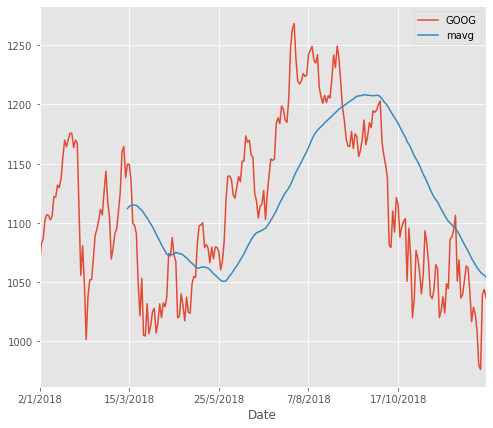

In [4]:
# Plotting the Moving Average

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='GOOG')
mavg.plot(label='mavg')
plt.legend()

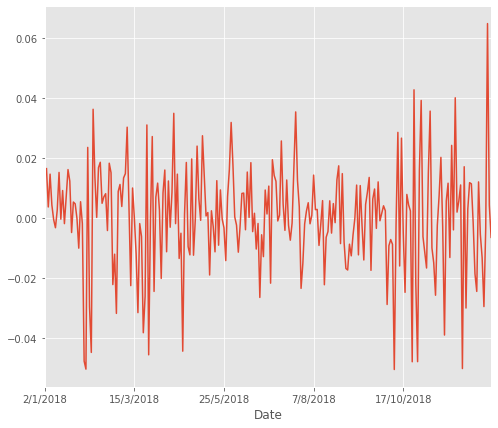

In [25]:
# Measure Expected Return

rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [34]:
# Creating lags 20 days back

df["close1"] = close_px.shift(1)
df["close2"] = close_px.shift(2)
df["close3"] = close_px.shift(3)
df["close4"] = close_px.shift(4)
df["close5"] = close_px.shift(5)
df["close6"] = close_px.shift(6)
df["close7"] = close_px.shift(7)
df["close8"] = close_px.shift(8)
df["close9"] = close_px.shift(9)
df["close10"] = close_px.shift(10)
df["close11"] = close_px.shift(11)
df["close12"] = close_px.shift(12)
df["close13"] = close_px.shift(13)
df["close14"] = close_px.shift(14)
df["close15"] = close_px.shift(15)
df["close16"] = close_px.shift(16)
df["close17"] = close_px.shift(17)
df["close18"] = close_px.shift(18)
df["close19"] = close_px.shift(19)
df["close20"] = close_px.shift(20)

# Drop missing value
dfreg = df.dropna()
print(dfreg.head())



                  Open         High          Low        Close   Volume  \
Date                                                                     
31/1/2018  1170.569946  1173.000000  1159.130005  1169.939941  1538700   
1/2/2018   1162.609985  1174.000000  1157.520020  1167.699951  2412100   
2/2/2018   1122.000000  1123.069946  1107.277954  1111.900024  4857900   
5/2/2018   1090.599976  1110.000000  1052.030029  1055.800049  3798300   
6/2/2018   1027.180054  1081.709961  1023.137024  1080.599976  3448000   

                close1       close2       close3       close4       close5  \
Date                                                                         
31/1/2018  1163.689941  1175.579956  1175.839966  1170.369995  1164.239990   
1/2/2018   1169.939941  1163.689941  1175.579956  1175.839966  1170.369995   
2/2/2018   1167.699951  1169.939941  1163.689941  1175.579956  1175.839966   
5/2/2018   1111.900024  1167.699951  1169.939941  1163.689941  1175.579956   
6/2/2018   10

In [37]:
# Pre-processing & Splitting of 20 days lagged

X = dfreg.iloc[:,5:]
y = dfreg.iloc[:,3]

X_train = X.loc[:'1/10/2018']
X_test = X.loc['1/10/2018':]

X_train = X_train.values
X_test = X_test.values

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

y_train = y.loc[:'1/10/2018']
y_test = y.loc['1/10/2018':]

y_train = y_train.values
y_test = y_test.values

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((169, 20), (169,), (62, 20), (62,))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [39]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [45]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [46]:
# accuracy of model with train set

confidencereg = clfreg.score(X_train, y_train)
confidencepoly2 = clfpoly2.score(X_train, y_train)
confidencepoly3 = clfpoly3.score(X_train, y_train)
confidenceknn = clfknn.score(X_train, y_train)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

The linear regression accuracy is 0.9441624973921683
The quadratic regression 2 accuracy is 0.9749943896612729
The quadratic regression 3 accuracy is 0.9981019859238401
The knn regression accuracy is 0.9784517263341801


In [47]:
# accuracy of model with test set

confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
print('The linear regression accuracy is', confidencereg)
print('The quadratic regression 2 accuracy is', confidencepoly2)
print('The quadratic regression 3 accuracy is', confidencepoly3)
print('The knn regression accuracy is', confidenceknn)

The linear regression accuracy is -0.9565787408138766
The quadratic regression 2 accuracy is -0.9006996203082265
The quadratic regression 3 accuracy is -2.725507122244867
The knn regression accuracy is -1.6419034799885441


In [48]:
# rmse of model with test set

from sklearn.metrics import mean_squared_error
from math import sqrt

rmsereg = sqrt(mean_squared_error(y_test, clfreg.predict(X_test)))
rmsepoly2 = sqrt(mean_squared_error(y_test, clfpoly2.predict(X_test)))
rmsepoly3 = sqrt(mean_squared_error(y_test, clfpoly3.predict(X_test)))
rmseknn = sqrt(mean_squared_error(y_test, clfknn.predict(X_test)))

# results
print('The linear regression rmse is', rmsereg)
print('The quadratic regression 2 rmse is', rmsepoly2)
print('The quadratic regression 3 rmse is', rmsepoly3)
print('The knn regression rmse is', rmseknn)

The linear regression rmse is 67.23734965319098
The quadratic regression 2 rmse is 66.27025854898476
The quadratic regression 3 rmse is 92.78005379336913
The knn regression rmse is 78.130462372869


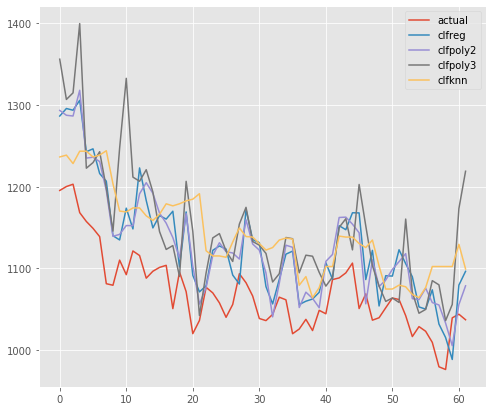

In [49]:
# plot of estimated and actual close price

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

y_test = pd.DataFrame(y_test)
y_clfreg = pd.DataFrame(clfreg.predict(X_test))
y_clfpoly2 = pd.DataFrame(clfpoly2.predict(X_test))
y_clfpoly3 = pd.DataFrame(clfpoly3.predict(X_test))
y_clfknn = pd.DataFrame(clfknn.predict(X_test))
plt.plot(y_test, label="actual")
plt.plot(y_clfreg, label="clfreg")
plt.plot(y_clfpoly2, label="clfpoly2")
plt.plot(y_clfpoly3, label="clfpoly3")
plt.plot(y_clfknn, label="clfknn")
plt.legend()

In [50]:
# Autocorrelation suggest that the model will be overfitted. Hence, we expect a high test rmse. 
# But when the model is applied to the test set,the test rmse is suprisingly quite low. 

# Why?! 
# Possible suggestions:
# - no. of data points is too low (?)
# -> realised that the train-test split was randomnised and not split on a fixed date
# randomnized -> takes into account seasonality? 
# fixed date -> does not take into account seasonality?

# for time-series analysis, new data points that you'll get will be future dates, so doesn't make sense if you randomnise the 
# split since you'll be trying to predict future dates with the model. But at the same time, date was not one of the IVs used 
# in the model

# Next step:
# - use 20 years historical data
# - match quarter to quarter data to take into account the seasonaility of the stock prices